### Looking at how properties change with aperture/radius

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eagleSqlTools as sql
con = sql.connect("nkl161", password="FCGxrt20")

In [4]:
# Pull jellyfish candidate IDs from external file
jellyfish_ID = np.genfromtxt('CandidateIDs.dat')
# Set available aperture sizes in kpc
apsizes = [1, 3, 5, 10, 20, 30, 40, 50, 70, 100]

In [44]:
jellyfish_ap = []

for i in range(len(jellyfish_ID)):
    # This list will hold the information for each radius for a given galaxy
    temp = []
    for size in apsizes:
        query = """
        select
            ap.galaxyid as ID,
            ap.ApertureSize as radius,
            ap.Mass_Gas as Mgas,
            ap.SFR
        from
            RefL0100N1504_Aperture as ap
        where
            ap.galaxyid = %d
            and
            ap.ApertureSize = %d
        """%(jellyfish_ID[i], size)

        output = sql.execute_query(con, query)
        temp.append(output)
    # Append the temporary list of radii & param to the overall list
    jellyfish_ap.append(temp)

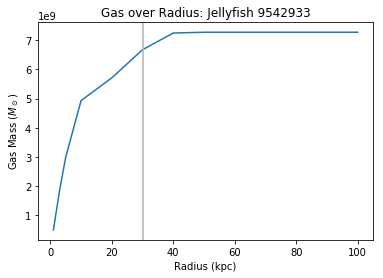

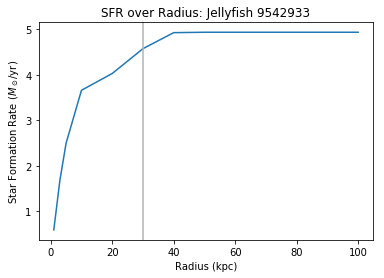

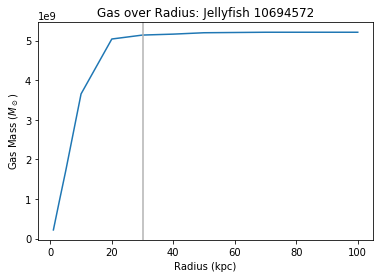

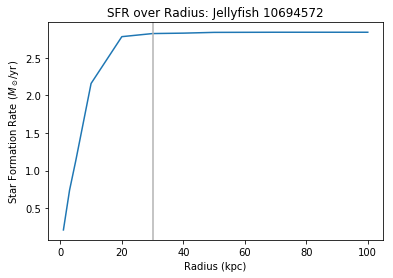

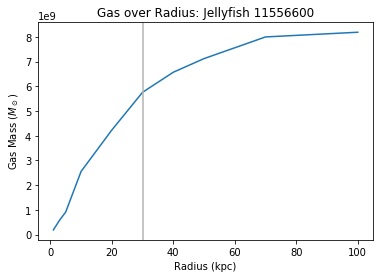

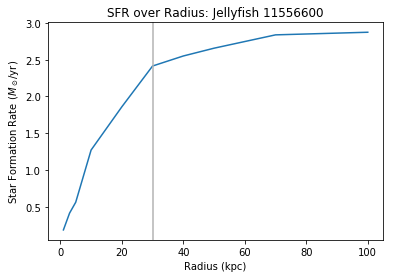

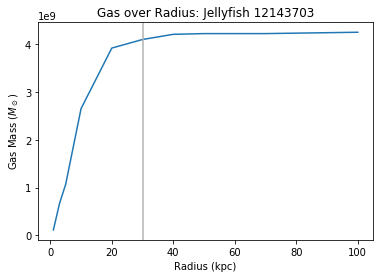

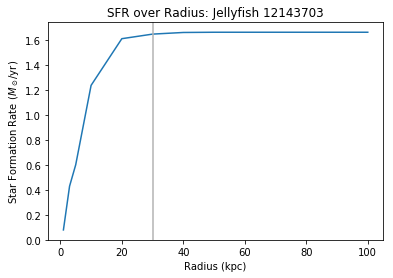

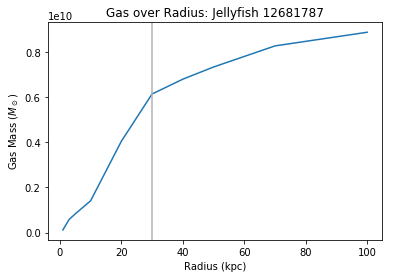

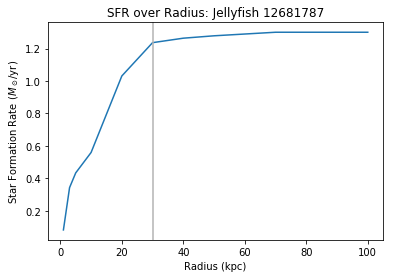

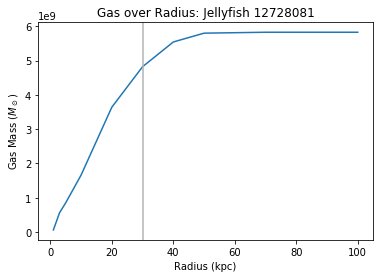

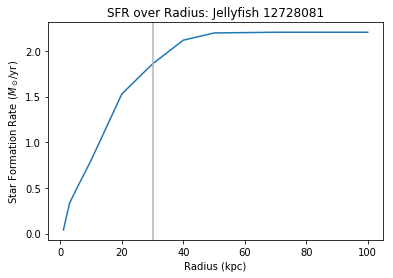

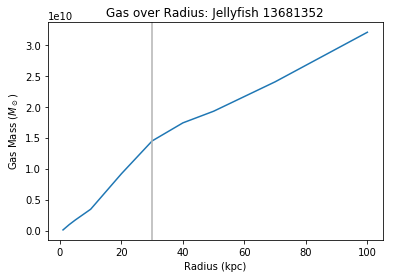

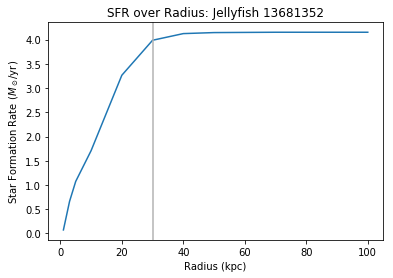

In [63]:
for i in range(len(jellyfish_ap)):
    gases = []
    sfr = []
    
    for size in range(10):
    #     print(jellyfish_ap[0][i]['Mgas'])
        gases.append(jellyfish_ap[i][size]['Mgas'])
        sfr.append(jellyfish_ap[i][size]['SFR'])
    
    plt.plot(apsizes, gases)
    plt.xlabel('Radius (kpc)')
    plt.ylabel('Gas Mass ($M_\odot$)')
    plt.axvline(30, c='0.7')
    plt.title('Gas over Radius: Jellyfish '+str(jellyfish_ap[i][0]['ID']))
    plt.show()
    plt.close()
    
    plt.plot(apsizes, sfr)
    plt.xlabel('Radius (kpc)')
    plt.ylabel('Star Formation Rate ($M_\odot$/yr)')
    plt.title('SFR over Radius: Jellyfish '+str(jellyfish_ap[i][0]['ID']))
    plt.axvline(30, c='0.7')
    plt.show()
    plt.close()